# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

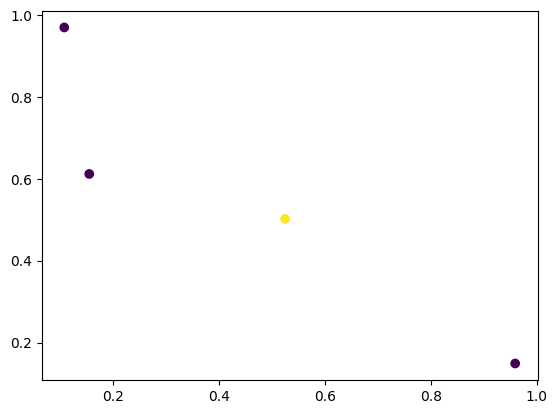

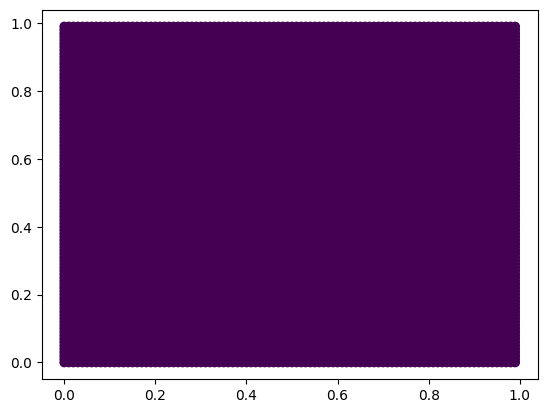

False

In [91]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n, test=False):
    for l in range(1,2**n-1):
        y = bin(l)
        y = [int(y[i]) for i in range(2,len(y))]
        y = [0 for _ in range(n-len(y))] + y
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n,y)
        y_pred = model.predict(S_n)
        if np.mean((y_pred-y)**2) > 0:
            if d==2 and test:
                S_n = np.transpose(S_n)
                plt.scatter(S_n[0],S_n[1],c=y)
                plt.show()
                x2,y2=np.meshgrid(np.arange(0,1,1/100),np.arange(0,1,1/100))
                plt.scatter(x2.ravel(),y2.ravel(),c=model.predict(np.transpose([x2.ravel(),y2.ravel()])))
                plt.show()
            return False
    return True

d=2
n=4
X = [np.random.uniform(0,1,d) for _ in range(n)]
is_shattered(d,n,X, True)

In [75]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

### c)

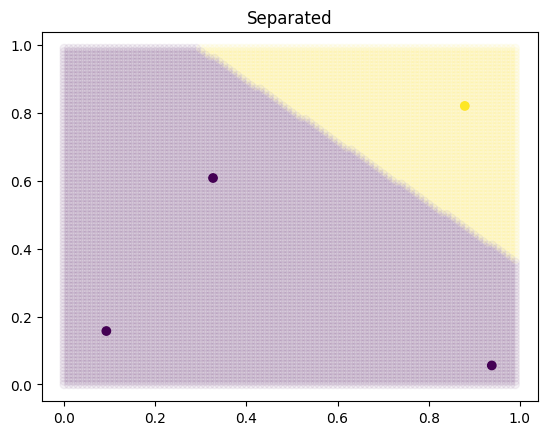

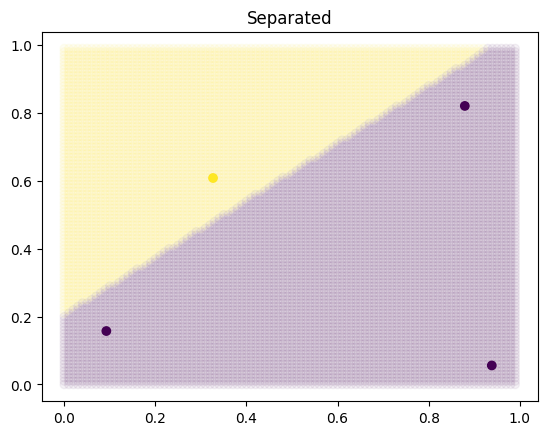

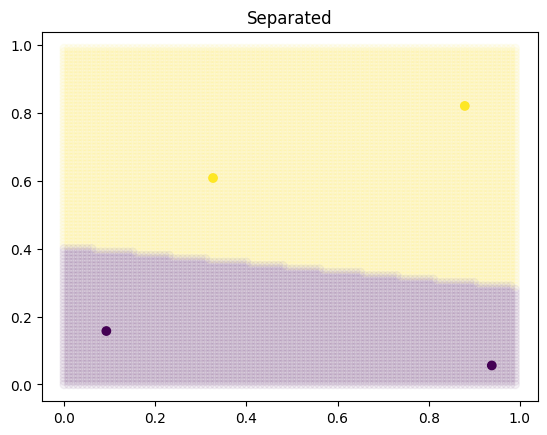

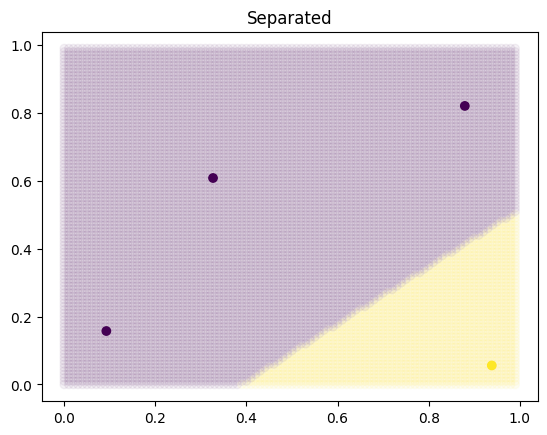

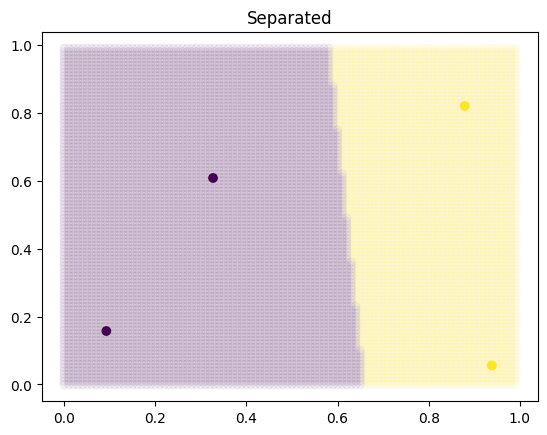

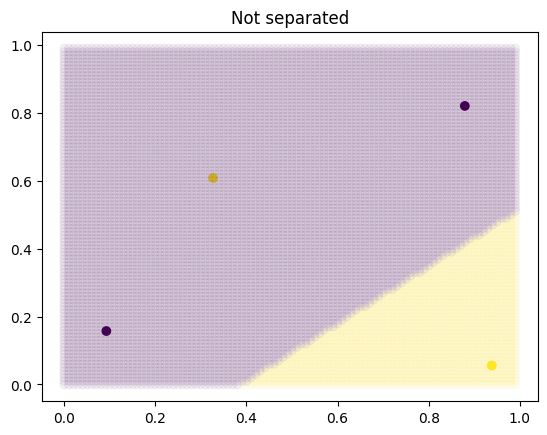

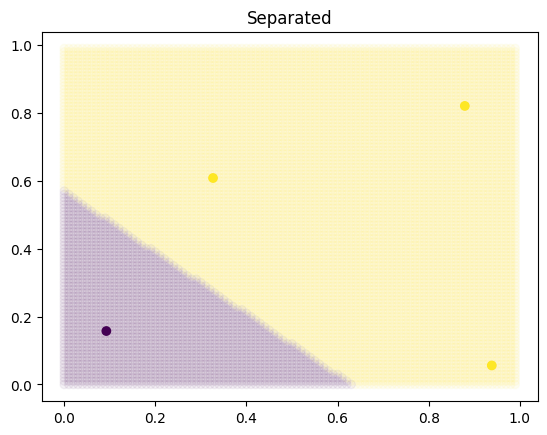

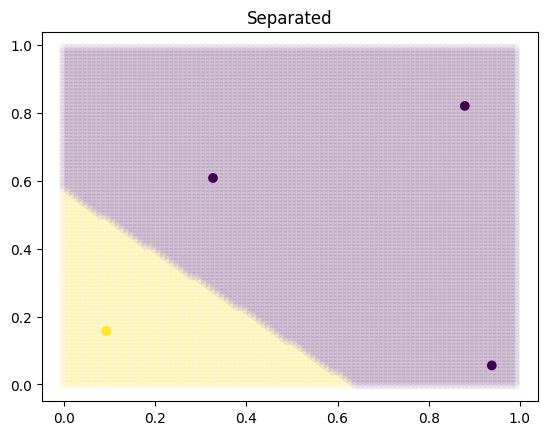

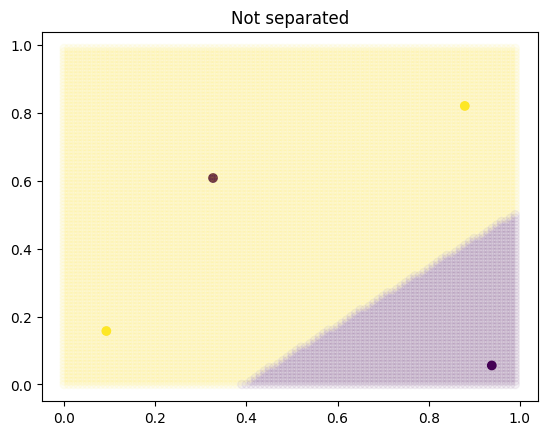

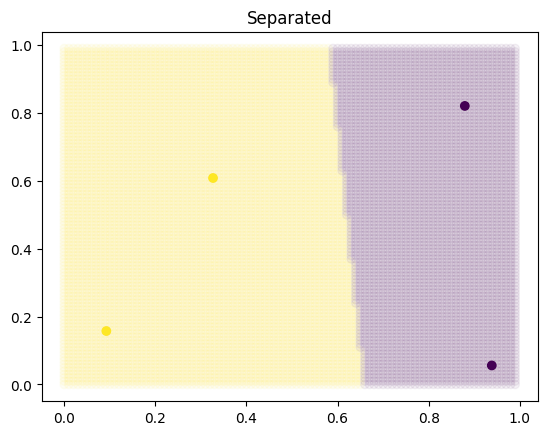

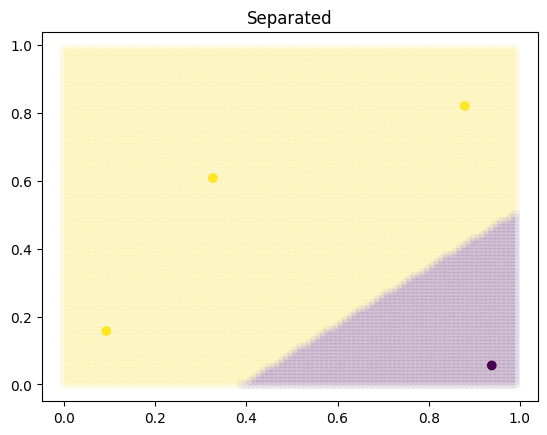

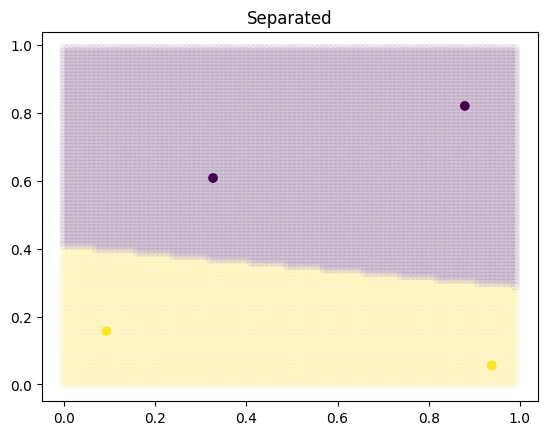

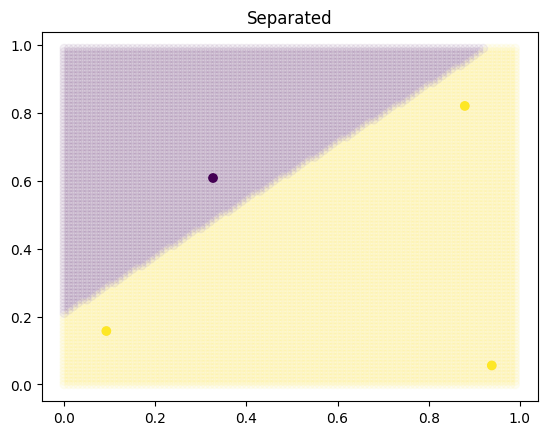

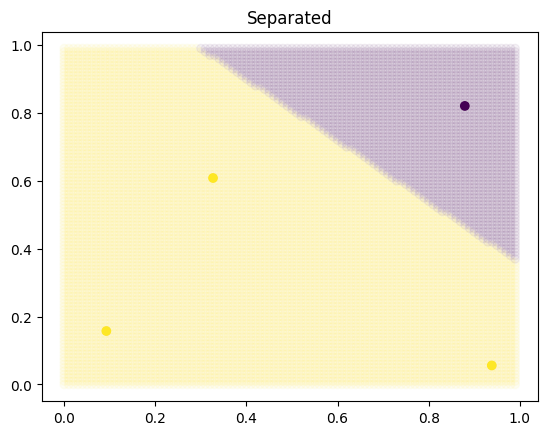

In [87]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

S_n=X
for l in range(1,2**n-1):
        y = bin(l)
        y = [int(y[i]) for i in range(2,len(y))]
        y = [0 for _ in range(n-len(y))] + y
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n,y)
        y_pred = model.predict(S_n)
        X2 = np.transpose(S_n)
        
        plt.scatter(X2[0],X2[1],c=y)
        x2,y2=np.meshgrid(np.arange(0,1,1/100),np.arange(0,1,1/100))
        plt.scatter(x2.ravel(),y2.ravel(),c=model.predict(np.transpose([x2.ravel(),y2.ravel()])), alpha=0.05)
        plt.title("Separated")
        if np.mean((y_pred-y)**2) > 0:
                plt.title("Not separated")
        plt.show()

### d)

In [105]:
# code
res = {}
for d in range(2,11):
    for n in range(2,14):
        stop=True
        for N in range(50):
            X = [np.random.normal(0,1,d) for _ in range(n)]
            if is_shattered(d,n,X):
                stop=False
                break
        res[d]=n
        if stop:
            
            break
         
        
res

{2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12}

### e)

In [ ]:
# A hint: change a kernel in SVM